In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime, timezone, timedelta

In [2]:
#user input, multiple
lakes = ["06015200","29007100","56038200","08004500","07004400","34004400","34008600","73020002"]

In [3]:
lakes_data = [pd.read_csv(f"Resources/{x}_catch.csv",converters={"lake_ID": str}) for x in lakes]

In [4]:
lakes_df = pd.concat(lakes_data)
lakes_df["survey_date"] = pd.to_datetime(lakes_df["survey_date"],format="%Y-%m-%d")
lakes_df["numeric_survey_date"] = pd.to_numeric(lakes_df["survey_date"])
lakes_df = lakes_df.sort_values("survey_date")
lakes_df = lakes_df.reset_index(drop=True)

lakes_df.head()

,lake_ID,lake_name,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight,numeric_survey_date
0,07004400,Madison,6.67,0.35,Standard gill nets,15.0,NaN,NaN,GIS,118373,1974-07-19,100,35.50,143424000000000000
1,07004400,Madison,8.1,0.36,Standard trap nets,10.0,NaN,NaN,CRP,118373,1974-07-19,81,29.00,143424000000000000
2,07004400,Madison,0.73,3.23,Standard gill nets,15.0,1.5-7.3,2.0-3.5,NOP,118373,1974-07-19,11,35.50,143424000000000000
3,07004400,Madison,0.2,1.62,Standard trap nets,10.0,NaN,NaN,LNG,118373,1974-07-19,2,3.25,143424000000000000
4,07004400,Madison,0.1,0.25,Standard trap nets,10.0,0.2-1.3,0.1-0.2,GSF,118373,1974-07-19,1,0.25,143424000000000000


In [5]:
i=0
for _ in lakes_df["CPUE"]:
    try:
        np.float64(_)
        i = i + 1
    except ValueError:
        print(i, _,"valueerror")
        lakes_df = lakes_df.drop([i])
        i = i + 1

829 ? valueerror
852 ? valueerror
1002 ? valueerror
1003 ? valueerror
1263 ? valueerror
1285 ? valueerror
1416 ? valueerror
1912 ? valueerror
1913 ? valueerror
1915 ? valueerror


In [6]:
lakes_df["CPUE"] = pd.to_numeric(lakes_df["CPUE"])

In [7]:
lakes_df.dtypes

lake_ID                        object
lake_name                      object
CPUE                          float64
averageWeight                 float64
gear                           object
gearCount                     float64
quartileCount                  object
quartileWeight                 object
species                        object
survey_ID                       int64
survey_date            datetime64[ns]
totalCatch                      int64
totalWeight                   float64
numeric_survey_date             int64
dtype: object

In [24]:
#user input, singular
species = "WAE"

In [25]:
lake_boxplot_cpue_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    lake_boxplot_cpue_list.append(species_cpue)

#### Print box plots for each lake

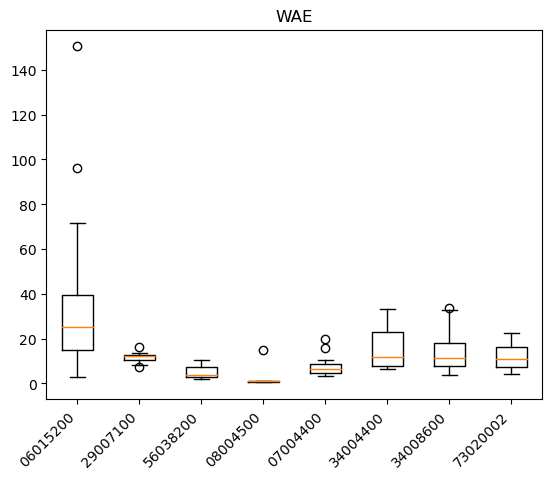

In [26]:
plt.boxplot(lake_boxplot_cpue_list)
labels = lakes
ticks = range(1, len(lakes)+1)
plt.xticks(ticks=ticks, labels=labels, rotation=45, ha="right")
plt.title(species)
plt.show()

In [27]:
#user input, singular
start_date = np.datetime64('2005-02-25')

In [28]:
#all dates after start date
lake_scatter_cpue_list = []
lake_scatter_survey_date_list = []
lake_scatter_numeric_survey_date_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    species_survey_date = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "survey_date"]
    lake_scatter_numeric_survey_date = (lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "numeric_survey_date"])
    lake_scatter_cpue_list.append(species_cpue)
    lake_scatter_survey_date_list.append(species_survey_date)
    lake_scatter_numeric_survey_date_list.append(lake_scatter_numeric_survey_date)

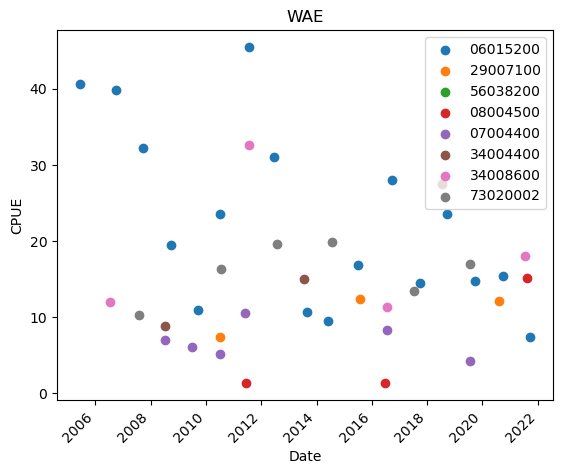

In [29]:
for _ in range(len(lakes)):
    plt.scatter(lake_scatter_survey_date_list[_],lake_scatter_cpue_list[_], label=lakes[_])
plt.title(species)
plt.ylabel("CPUE")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.show()

#### Plot CPUE and regression for each lake.

Notes:
Survey Data Empty for 56038200


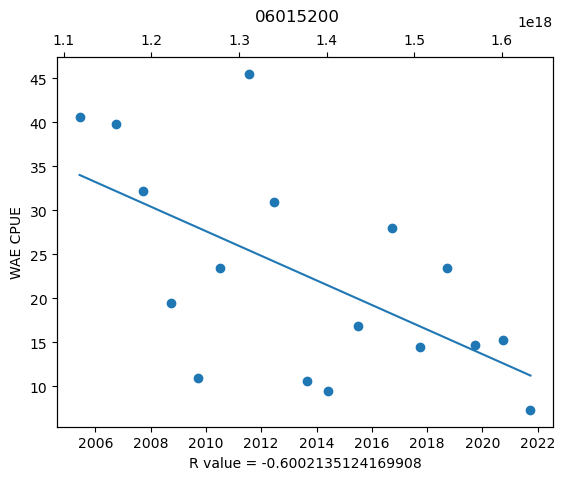

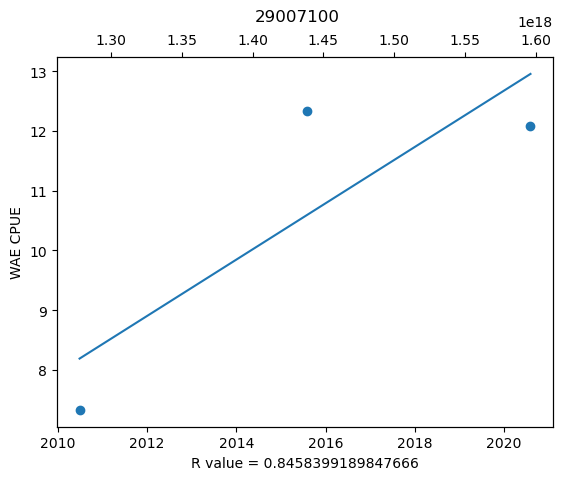

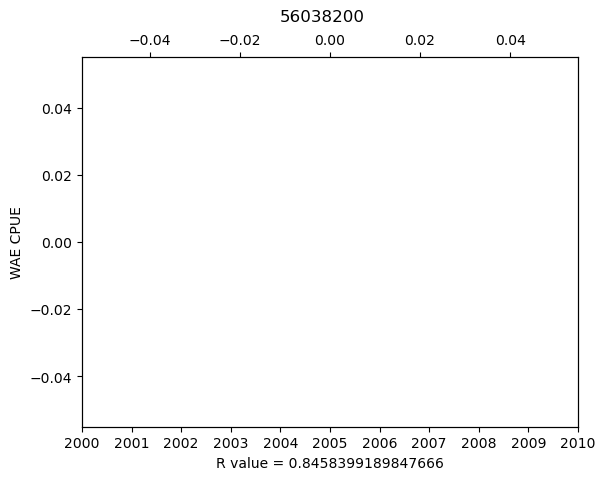

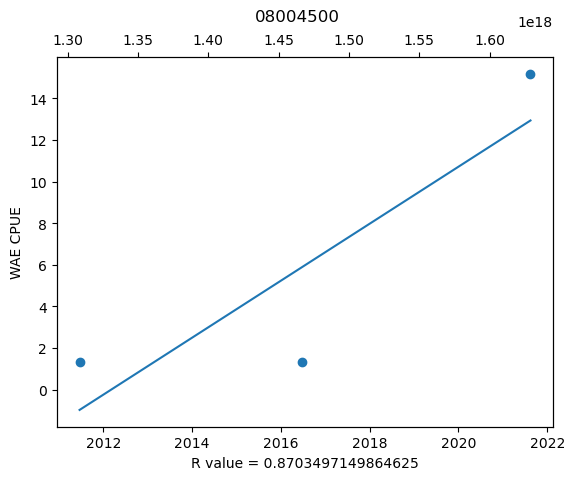

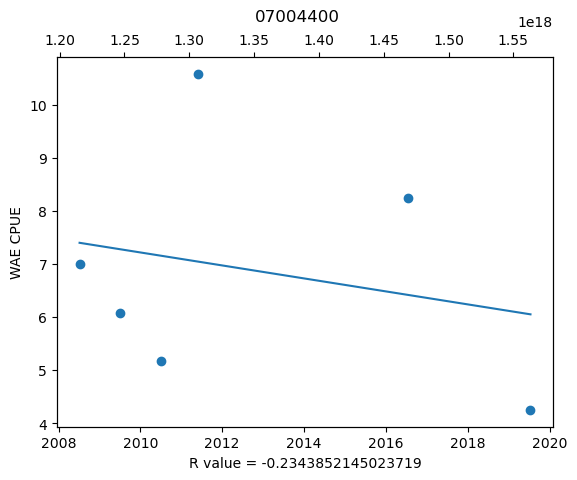

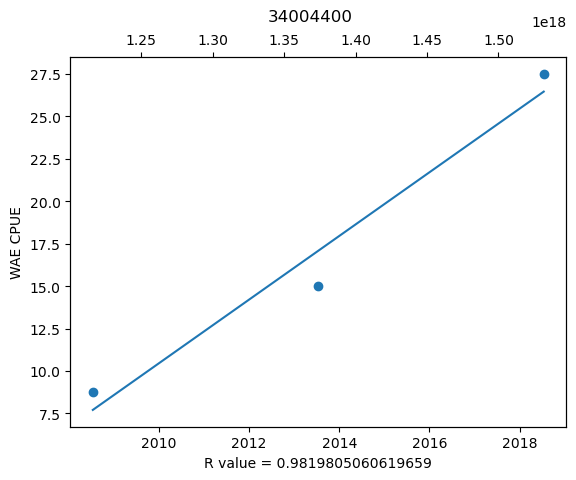

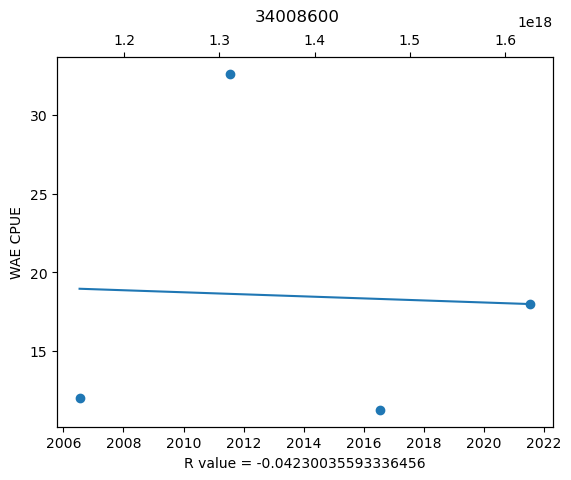

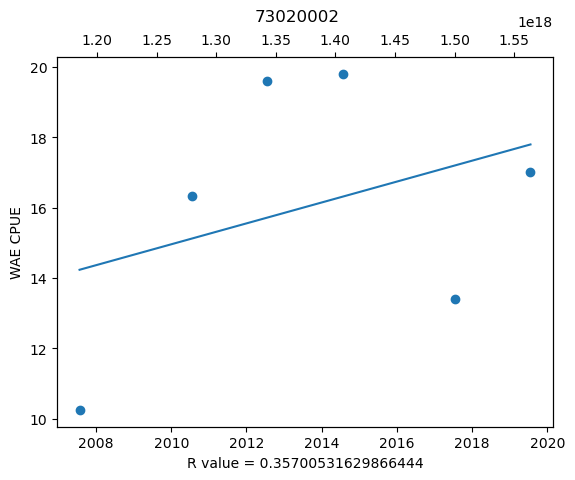

In [30]:
print("Notes:")
for lake in range(len(lakes)):
    if len(lake_scatter_numeric_survey_date_list[lake]) == 0:
        print(f"Survey Data Empty for {lakes[lake]}")
    elif len(lake_scatter_numeric_survey_date_list[lake]) == 1:
        print(f"Only 1 data point exists for {lakes[lake]}")
    else:
        regression_values = linregress(lake_scatter_numeric_survey_date_list[lake],lake_scatter_cpue_list[lake])
    fig, ax1 = plt.subplots(1,1)
    fig.suptitle(lakes[lake])
    ax1.scatter(lake_scatter_survey_date_list[lake],lake_scatter_cpue_list[lake], label=lakes[lake])
    ax1.set_ylabel(f"{species} CPUE")
    ax1.set_xlabel(f"R value = {regression_values.rvalue}")
    ax2 = ax1.twiny()
    ax2.plot(lake_scatter_numeric_survey_date_list[lake],(regression_values.slope*lake_scatter_numeric_survey_date_list[lake] + regression_values.intercept))

plt.show()